In [1]:
#!git clone https://github.com/jinfagang/yolov7

In [2]:
cd yolov7

/root/Puneet/yolov7


In [3]:
import sys
sys.version

'3.9.12 (main, Apr  5 2022, 06:56:58) \n[GCC 7.5.0]'

In [4]:
import torch, torchvision

In [5]:
print(torch.__version__, torch.cuda.is_available())

1.9.0+cu111 True


In [6]:
# !python -m pip install pyyaml==5.1
# # Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# # so we install from source instead. This takes a few minutes.
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# # Install pre-built detectron2 that matches pytorch version, if released:
# # See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# #!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# # exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

In [7]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Thu_Nov_18_09:45:30_PST_2021
Cuda compilation tools, release 11.5, V11.5.119
Build cuda_11.5.r11.5/compiler.30672275_0


In [8]:
!lspci | grep -i nvidia

00:1e.0 VGA compatible controller: NVIDIA Corporation GM204GL [Tesla M60] (rev a1)


In [9]:
!uname -m && cat /etc/*release

x86_64
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.1 LTS"
PRETTY_NAME="Ubuntu 22.04.1 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.1 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [10]:
!gcc --version

gcc (Ubuntu 11.2.0-19ubuntu1) 11.2.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [11]:
!uname -r

5.15.0-1020-aws


In [12]:
#!sudo apt-get install cuda-

In [13]:
# wget https://developer.download.nvidia.com/compute/cuda/11.7.1/local_installers/cuda_11.7.1_515.65.01_linux.run
# sudo sh cuda_11.7.1_515.65.01_linux.run

In [14]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Thu_Nov_18_09:45:30_PST_2021
Cuda compilation tools, release 11.5, V11.5.119
Build cuda_11.5.r11.5/compiler.30672275_0
torch:  1.9 ; cuda:  cu111
detectron2: 0.6


In [10]:
torch.cuda.is_available()

False

In [19]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Train on a custom dataset

In [18]:
# import os
# arr = os.listdir("/root/labelstudio/images")

# len(arr)

# import json
  
# # Opening JSON file
# f = open('/root/labelstudio/result.json')
  
# dataset_dicts = json.load(f)

# dataset_dicts.keys()

# dataset_dicts['images'][0]

# for a in range(len(dataset_dicts['images'])):
#   dataset_dicts['images'][a]['file_name'] = dataset_dicts['images'][a]['file_name'].split('/')[2]


# with open("/root/labelstudio/result.json", "w") as outfile:
#     json.dump(dataset_dicts, outfile)

In [15]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/root/labelstudio/result.json", "/root/labelstudio/images/")

In [20]:
#register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")

<!-- To verify the dataset is in correct format, let's visualize the annotations of randomly selected samples in the training set: -->



## Train!

Now, let's fine-tune a COCO-pretrained R50-FPN Mask R-CNN model on the balloon dataset. It takes ~2 minutes to train 300 iterations on a P100 GPU.


In [21]:
# !pip install alfred-py

In [131]:
# for car damage detection
!python train_inseg.py --config-file /root/Puneet/yolov7/configs/coco-instance/yolomask.yaml --resume --num-gpus 1

Install mish-cuda to speed up training and inference. More importantly, replace the naive Mish with MishCuda will give a ~1.5G memory saving during training.
/root/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[08/26 03:11:59 detectron2]: Rank of current process: 0. World size: 1
[08/26 03:12:00 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------------
sys.platform            linux
Python                  3.9.12 (main, Apr  5 2022, 06:56:58) [GCC 7.5.0]
numpy                   1.23.2
detectron2              0.6 @/root/anaconda3/lib/python3.9/site-packages/detectron2
Compiler                GCC 11.2
CUDA compiler           not available
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.12.1+cu102 @/root/anaconda3

In [26]:
# !zip -r /content/output.zip /content/yolov7/output
# from google.colab import files
# files.download("/content/output.zip")

In [133]:
DatasetCatalog

DatasetCatalog(registered datasets: coco_2014_train, coco_2014_val, coco_2014_minival, coco_2014_valminusminival, coco_2017_train, coco_2017_val, coco_2017_test, coco_2017_test-dev, coco_2017_val_100, keypoints_coco_2014_train, keypoints_coco_2014_val, keypoints_coco_2014_minival, keypoints_coco_2014_valminusminival, keypoints_coco_2017_train, keypoints_coco_2017_val, keypoints_coco_2017_val_100, coco_2017_train_panoptic_separated, coco_2017_train_panoptic_stuffonly, coco_2017_train_panoptic, coco_2017_val_panoptic_separated, coco_2017_val_panoptic_stuffonly, coco_2017_val_panoptic, coco_2017_val_100_panoptic_separated, coco_2017_val_100_panoptic_stuffonly, coco_2017_val_100_panoptic, lvis_v1_train, lvis_v1_val, lvis_v1_test_dev, lvis_v1_test_challenge, lvis_v0.5_train, lvis_v0.5_val, lvis_v0.5_val_rand_100, lvis_v0.5_test, lvis_v0.5_train_cocofied, lvis_v0.5_val_cocofied, cityscapes_fine_instance_seg_train, cityscapes_fine_sem_seg_train, cityscapes_fine_instance_seg_val, cityscapes_fi

In [134]:
# import torch
# torch.cuda.empty_cache()

In [80]:
# import gc
# del variables
# gc.collect()

In [81]:
#!pip install alfred-py

In [82]:
#unzip /content/output

In [12]:
!uname -r

5.15.0-1019-aws


In [16]:
from detectron2.engine.defaults import DefaultTrainer

In [17]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from yolov7.config import add_yolo_config

Install mish-cuda to speed up training and inference. More importantly, replace the naive Mish with MishCuda will give a ~1.5G memory saving during training.
/root/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
cfg = get_cfg()
add_yolo_config(cfg)
cfg.merge_from_file("/root/Puneet/yolov7/configs/coco-instance/yolomask.yaml")
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "/root/Puneet/yolov7/output/coco_yolomask_wirebundle/model_final.pth"  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 8  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
print(cfg.SOLVER.IMS_PER_BATCH)
# trainer = DefaultTrainer(cfg) 
# trainer.resume_or_load(resume=True)
# trainer.train()

8


## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:



In [21]:
os.path.join(cfg.OUTPUT_DIR, "model_final.pth") 

'output/coco_yolomask_wirebundle/model_final.pth'

In [22]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0039999.pth") 
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
#cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
predictor = DefaultPredictor(cfg)

02:01:18 09.27 INFO yolomask.py:86]: YOLO.ANCHORS: [[142, 110], [192, 243], [459, 401], [36, 75], [76, 55], [72, 146], [12, 16], [19, 36], [40, 28]]
02:01:18 09.27 INFO yolomask.py:89]: backboneshape: [64, 128, 256, 512], size_divisibility: 32


[[142, 110], [192, 243], [459, 401], [36, 75], [76, 55], [72, 146], [12, 16], [19, 36], [40, 28]]
[09/27 02:01:28 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                    | Names in Checkpoint                                                                                   | Shapes                         |
|:--------------------------------------------------|:------------------------------------------------------------------------------------------------------|:-------------------------------|
| backbone.dark2.0.bn.*                             | backbone.dark2.0.bn.{bias,num_batches_tracked,running_mean,running_var,weight}                        | (64,) () (64,) (64,) (64,)     |
| backbone.dark2.0.conv.weight                      | backbone.dark2.0.conv.weight                                                                          | (64, 32, 3, 3)                 |
| backbone.dark2.1.conv1.bn.*                      

Then, we randomly select several samples to visualize the prediction results.

In [23]:
#torch.cuda.memory_summary(device=None, abbreviated=False)


In [24]:
from detectron2.utils.visualizer import ColorMode

In [25]:
im = cv2.imread("/root/labelstudio/images/0085c7f5-IMG_0345.JPG")

In [137]:
# import sys
# print('__Python VERSION:', sys.version)
# print('__pyTorch VERSION:', torch.__version__)
# print('__CUDA VERSION')
# from subprocess import call
# # call(["nvcc", "--version"]) does not work
# ! nvcc --version
# print('__CUDNN VERSION:', torch.backends.cudnn.version())
# print('__Number CUDA Devices:', torch.cuda.device_count())
# print('__Devices')
# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
# print('Active CUDA Device: GPU', torch.cuda.current_device())

# print ('Available devices ', torch.cuda.device_count())
# print ('Current cuda device ', torch.cuda.current_device())

In [26]:
outputs = predictor(im)

/root/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [27]:
import matplotlib.pyplot as plt
import matplotlib

In [28]:
#plt.imshow([out.get_image()[:,:,2],out.get_image()[:,:,1],out.get_image()[:,:,0]])

In [29]:
im.shape

(4032, 3024, 3)

CPU times: user 1.47 s, sys: 291 ms, total: 1.76 s
Wall time: 1.76 s


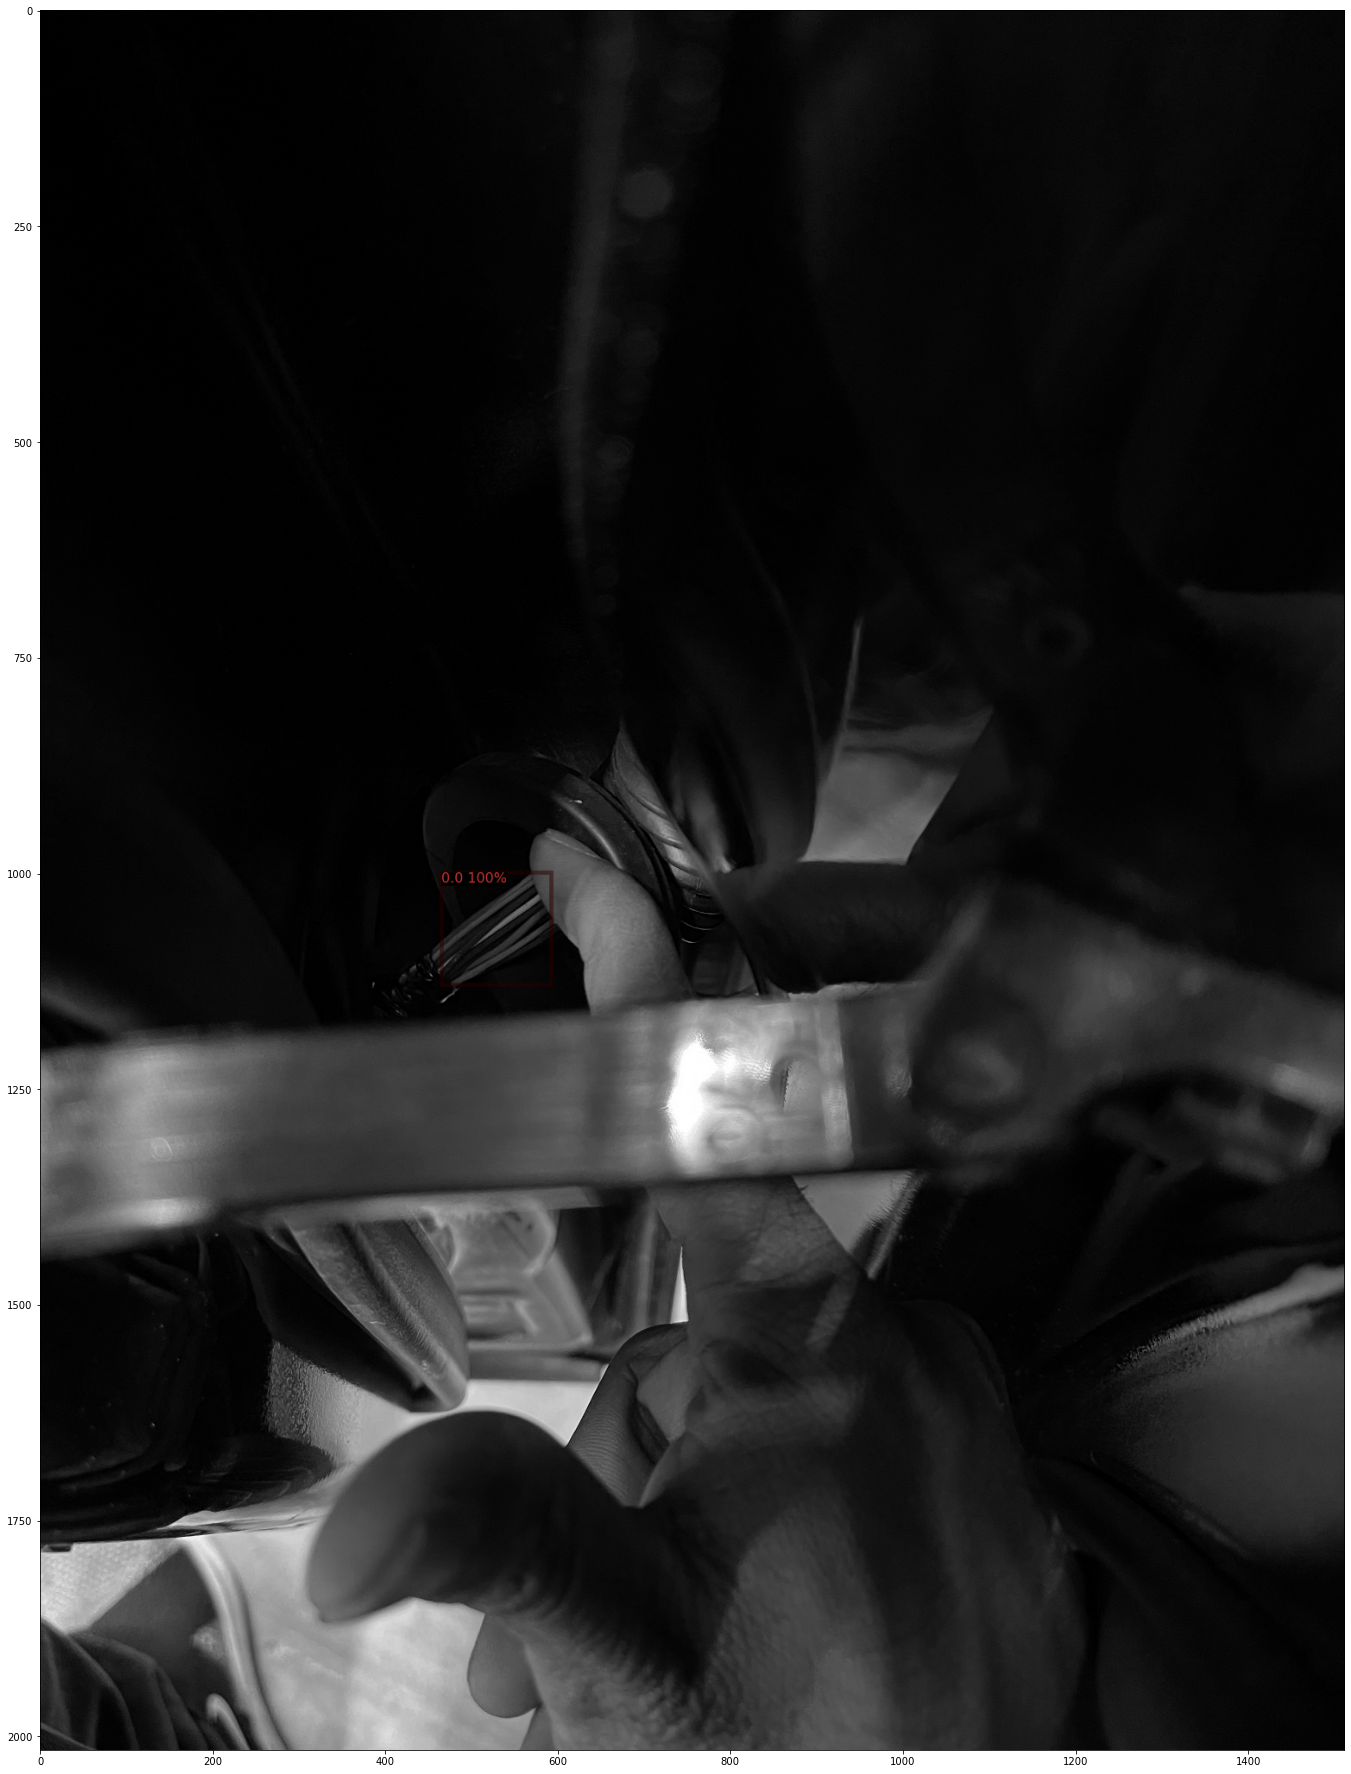

In [30]:
%%time
#-- 5-10 seconds ## Loading to prediction to output
plt.figure(figsize=(40, 32))
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
                scale=0.5, 
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])

In [143]:
import cv2

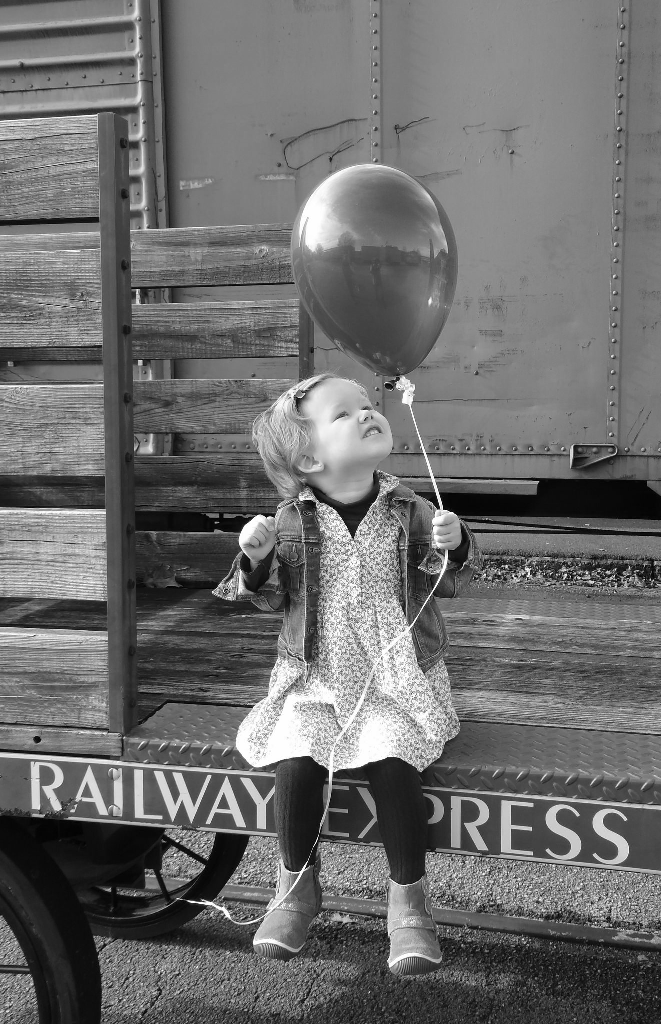

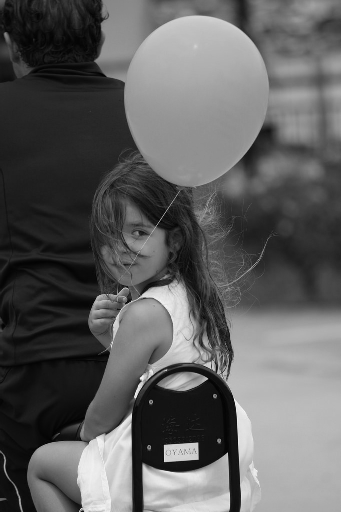

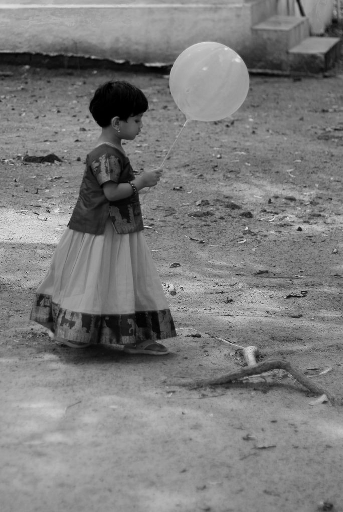

In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_balloon_dicts("balloon/val")
for d in random.sample(dataset_dicts, 3):  
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=balloon_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

We can also evaluate its performance using AP metric implemented in COCO API.
This gives an AP of ~70. Not bad!

In [144]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_train", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_train")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[08/26 03:15:03 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [08/26 03:15:03 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/26 03:15:03 d2.data.datasets.coco]: Loaded 50 images in COCO format from /root/labelstudio/result.json
[08/26 03:15:03 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(416, 416), max_size=608, sample_style='choice')]
[08/26 03:15:03 d2.data.common]: Serializing 50 elements to byte tensors and concatenating them all ...
[08/26 03:15:03 d2.data.common]: Serialized dataset takes 0.06 MiB
[08/26 03:15:03 d2.evaluation.evaluator]: Start inference on 50 batches
[08/26 03:15:07 d2.evaluation.evaluator]: Inference done 11/50. Dataloading: 0.3065 s/iter. Inference: 0.0442 s/iter. Eval: 0.0005 s/iter. Total: 0.3512 s/iter. ETA=0:00:13
[08/26 03:15:12 d2.evaluation.evaluator]: Infere

# Other types of builtin models

We showcase simple demos of other types of models below:

model_final_a6e10b.pkl: 237MB [00:11, 21.5MB/s]                           
/usr/local/lib/python3.7/dist-packages/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


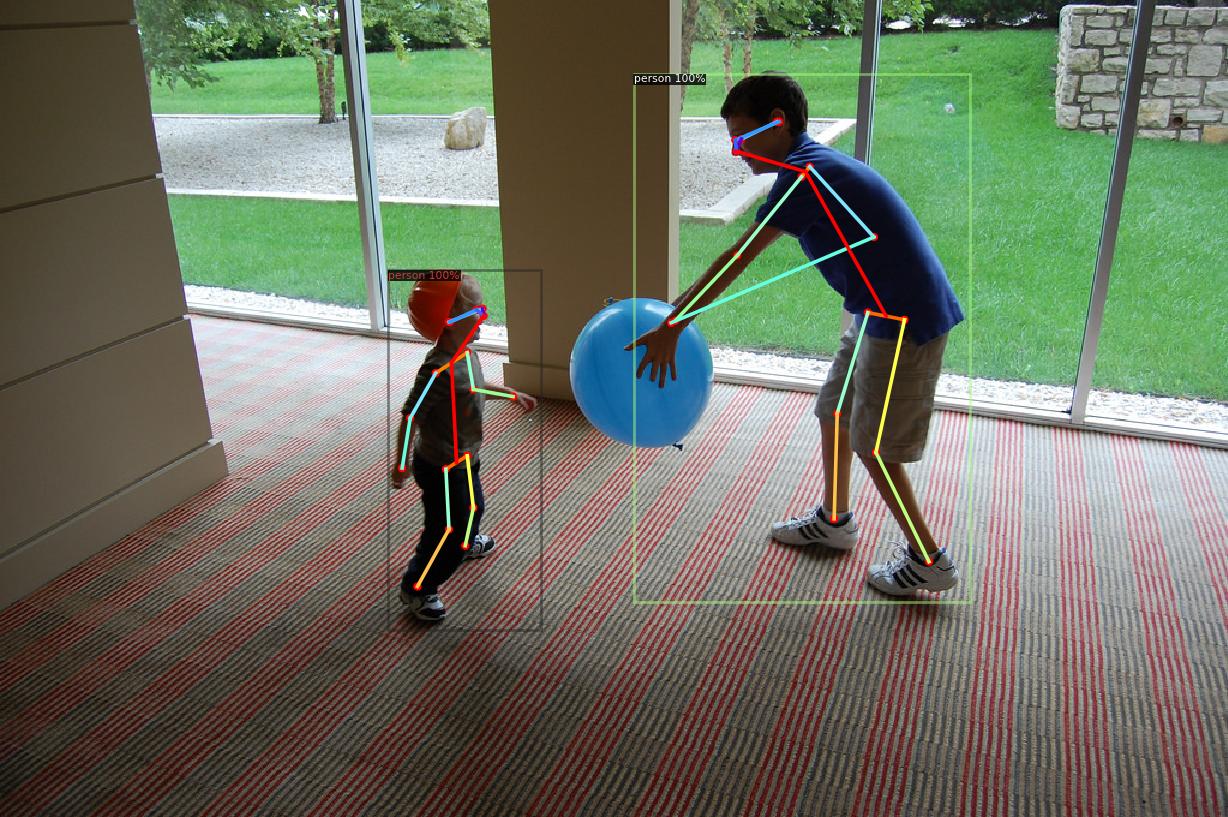

In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

WARNING [10/15 06:33:37 d2.config.compat]: Config './detectron2_repo/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


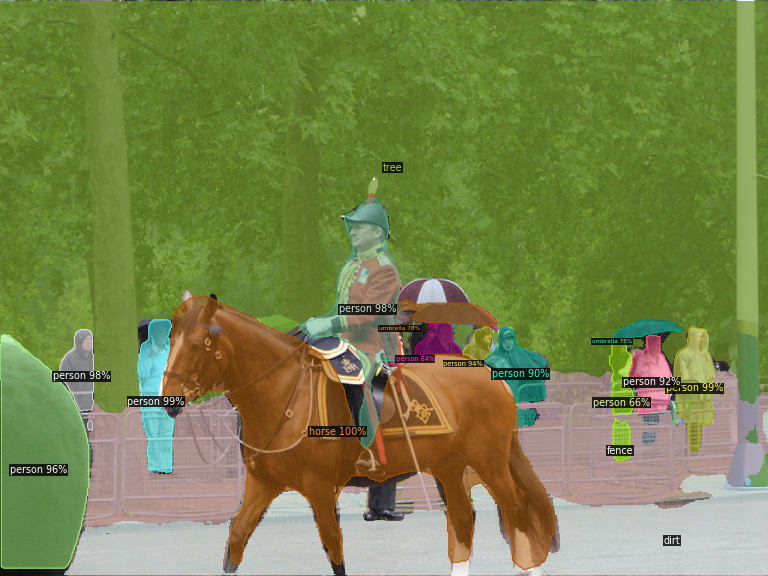

In [ ]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])